In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

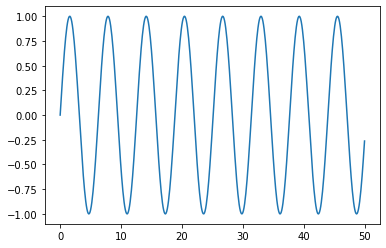

In [5]:
plt.plot(x,y)

In [8]:
data = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [9]:
data

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [10]:
test_percent=0.1

In [11]:
len(data)*test_percent

50.1

In [12]:
test_point = np.round(len(data)*test_percent)

In [13]:
test_point

50.0

In [14]:
test_index = int(len(data)-test_point)

In [15]:
test_index

451

In [18]:
train = data.iloc[:test_index]

In [19]:
test = data.iloc[test_index:]

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
length=50
batch_size=1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [36]:
len(scaled_train)

451

In [37]:
len(generator)

401

In [38]:
X,y = generator[0]

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [40]:
n_features =1

In [41]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\RW565TZ\AppData\Local\Temp\ipykernel_3360\1246993970.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=5)


401/401 [==============================] - 4s 8ms/step - loss: 0.0030
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 3.7689e-04
Epoch 3/5
401/401 [==============================] - 3s 6ms/step - loss: 1.5048e-05
Epoch 4/5
401/401 [==============================] - 3s 9ms/step - loss: 7.0793e-05
Epoch 5/5
401/401 [==============================] - 3s 9ms/step - loss: 2.8820e-04


In [44]:
losses = pd.DataFrame(model.history.history)

In [45]:
losses

,loss
0,0.002951
1,0.000377
2,0.000015
3,0.000071
4,0.000288


<AxesSubplot:>

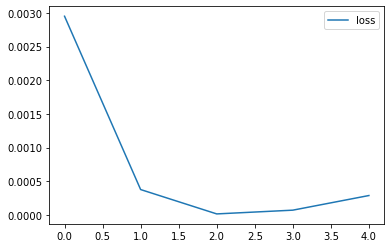

In [46]:
losses.plot()

In [47]:
first_eval_batch = scaled_train[-length:]

In [48]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [49]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 267ms/step


array([[0.94677263]], dtype=float32)

In [54]:
test_predictions=[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [55]:
test_predictions

[array([0.94677263], dtype=float32),
 array([0.9656546], dtype=float32),
 array([0.9791144], dtype=float32),
 array([0.98831457], dtype=float32),
 array([0.99258757], dtype=float32),
 array([0.99139595], dtype=float32),
 array([0.98624027], dtype=float32),
 array([0.97620773], dtype=float32),
 array([0.9621272], dtype=float32),
 array([0.943748], dtype=float32),
 array([0.9208508], dtype=float32),
 array([0.89454716], dtype=float32),
 array([0.8643353], dtype=float32),
 array([0.83072466], dtype=float32),
 array([0.79429734], dtype=float32),
 array([0.75437737], dtype=float32),
 array([0.7125689], dtype=float32),
 array([0.6680107], dtype=float32),
 array([0.62179697], dtype=float32),
 array([0.5738119], dtype=float32),
 array([0.5246653], dtype=float32),
 array([0.47500396], dtype=float32),
 array([0.42499214], dtype=float32),
 array([0.37536997], dtype=float32),
 array([0.32652768], dtype=float32),
 array([0.27908903], dtype=float32),
 array([0.23393963], dtype=float32),
 array([0.19

In [56]:
true_pred = scaler.inverse_transform(test_predictions)

In [57]:
true_pred

array([[ 0.89353987],
       [ 0.93130352],
       [ 0.9582229 ],
       [ 0.97662307],
       [ 0.98516899],
       [ 0.98278578],
       [ 0.9724745 ],
       [ 0.95240959],
       [ 0.92424877],
       [ 0.88749064],
       [ 0.84169664],
       [ 0.78908976],
       [ 0.72866652],
       [ 0.66144577],
       [ 0.58859172],
       [ 0.50875242],
       [ 0.42513611],
       [ 0.33602049],
       [ 0.24359374],
       [ 0.14762436],
       [ 0.04933196],
       [-0.04998992],
       [-0.15001274],
       [-0.2492563 ],
       [-0.34694008],
       [-0.44181662],
       [-0.5321147 ],
       [-0.61740087],
       [-0.69588799],
       [-0.76703516],
       [-0.83007072],
       [-0.88320373],
       [-0.92738895],
       [-0.96059379],
       [-0.98370617],
       [-0.995601  ],
       [-0.99666928],
       [-0.98694684],
       [-0.96674759],
       [-0.93667042],
       [-0.8971188 ],
       [-0.84878202],
       [-0.79296883],
       [-0.72992531],
       [-0.66099294],
       [-0

In [60]:
test['Predictions'] = true_pred

C:\Users\RW565TZ\AppData\Local\Temp\ipykernel_3360\3456487850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_pred


In [61]:
test

,Sine,Predictions
45.1,0.899097,0.893540
45.2,0.938307,0.931304
45.3,0.968142,0.958223
45.4,0.988304,0.976623
45.5,0.998591,0.985169
45.6,0.998900,0.982786
45.7,0.989229,0.972474
45.8,0.969673,0.952410
45.9,0.940429,0.924249
46.0,0.901788,0.887491


<AxesSubplot:>

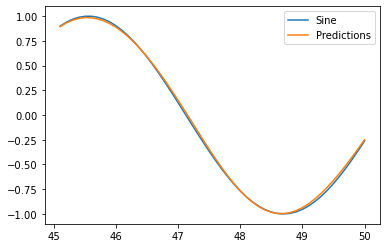

In [62]:
test.plot()

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping()

In [65]:
length = 49

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [67]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [68]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


C:\Users\RW565TZ\AppData\Local\Temp\ipykernel_3360\3786894748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])


402/402 [==============================] - 10s 19ms/step - loss: 0.0230 - val_loss: 1.2228e-04
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 8.8717e-05 - val_loss: 5.5715e-05


In [69]:
test_predictions=[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [72]:
true_predictions = scaler.inverse_transform(test_predictions)

In [73]:
test['LSTM Predictions'] = true_predictions

C:\Users\RW565TZ\AppData\Local\Temp\ipykernel_3360\2844857802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

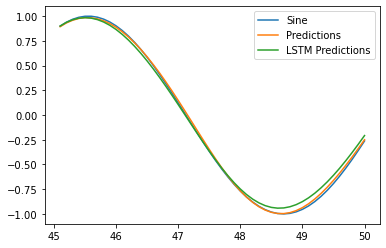

In [74]:
test.plot()

In [75]:
# Fore casting for future

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

In [76]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [77]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [78]:
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\RW565TZ\AppData\Local\Temp\ipykernel_3360\1408342416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


452/452 [==============================] - 10s 16ms/step - loss: 0.0090
Epoch 2/6
452/452 [==============================] - 8s 17ms/step - loss: 1.3483e-04
Epoch 3/6
452/452 [==============================] - 9s 19ms/step - loss: 6.5658e-05
Epoch 4/6
452/452 [==============================] - 7s 16ms/step - loss: 5.3794e-04
Epoch 5/6
452/452 [==============================] - 8s 18ms/step - loss: 2.9461e-05
Epoch 6/6
452/452 [==============================] - 8s 17ms/step - loss: 5.6026e-04


In [79]:
forecast=[]

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [80]:
forecast = scaler.inverse_transform(forecast)

In [81]:
forecast

array([[ 0.86896376],
       [ 0.8990498 ],
       [ 0.91836107],
       [ 0.92697053],
       [ 0.92510611],
       [ 0.91310911],
       [ 0.89140663],
       [ 0.86049341],
       [ 0.8209166 ],
       [ 0.77325914],
       [ 0.7181291 ],
       [ 0.65615054],
       [ 0.58795825],
       [ 0.51419606],
       [ 0.4355194 ],
       [ 0.35259772],
       [ 0.2661215 ],
       [ 0.17680692],
       [ 0.08540381],
       [-0.00730058],
       [-0.10047834],
       [-0.19325973],
       [-0.28474033],
       [-0.37398839],
       [-0.46005847]])

In [83]:
forecast_index = np.arange(50.1,52.6,step=0.1)

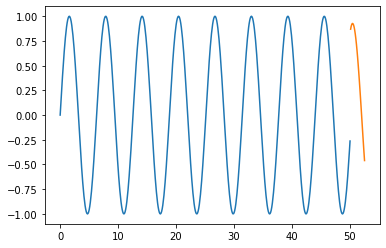

In [84]:
plt.plot(data.index,data['Sine'])
plt.plot(forecast_index,forecast)